<a href="https://colab.research.google.com/github/alejandromunizsiques/Proyecto-Covid/blob/main/Estudio_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion del notebook

Este notebook tiene como objetivo estudiar como el COVID 19 influye en nuestra sociedad

# Importacion de librerias 

In [ ]:
!pip install klib
!pip install --upgrade klib
import klib as klib
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


# Montaje del dataset

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Ejercicios personales Data Science/CASOS COVID.xlsx")
df = df.drop(columns=("Unnamed: 0"),axis=1)
df

,Fecha mensual,infectados_mensual,Numero_Comunas_Cuarentena,Imacec,IPC_Variacion_Mensual,Desocupados,Homicidios,Comercio ambulante o clandestino
0,2020-03-31 00:00:00,2737,17,113.426636,0.3,703.298985,48,619
1,31-04-2020,13285,17,98.478826,0.0,734.804297,62,739
2,2020-05-31 00:00:00,83609,41,97.793032,-0.1,878.812872,93,1429
3,31-06-2020,148283,23,96.121518,-0.1,936.388655,91,1015
4,2020-07-31 00:00:00,76144,9,96.100070,0.1,994.168223,74,848
5,2020-08-31 00:00:00,56049,11,101.066025,0.1,993.505385,58,641
6,31-09-2020,51171,24,103.167223,0.6,965.691333,66,637
7,2020-10-31 00:00:00,47143,25,108.477465,0.7,939.215811,105,911
8,31-11-2020,41487,11,114.596048,-0.1,879.222039,84,1266
9,2020-12-31 00:00:00,57211,9,122.862045,0.3,837.059732,61,2042


# Analisis exploratorio

## Correlacion Imacec con los demas


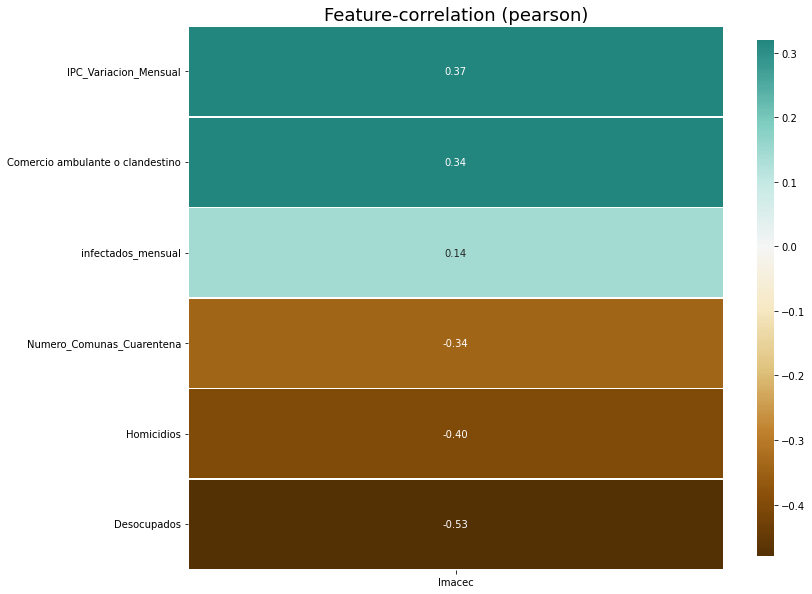

In [ ]:
klib.corr_plot(df, target='Imacec')

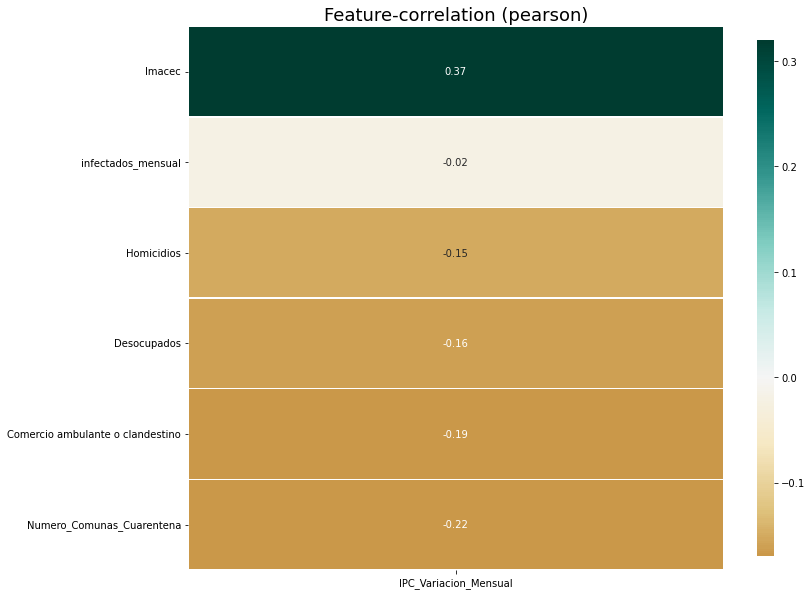

In [ ]:
klib.corr_plot(df, target='IPC_Variacion_Mensual')

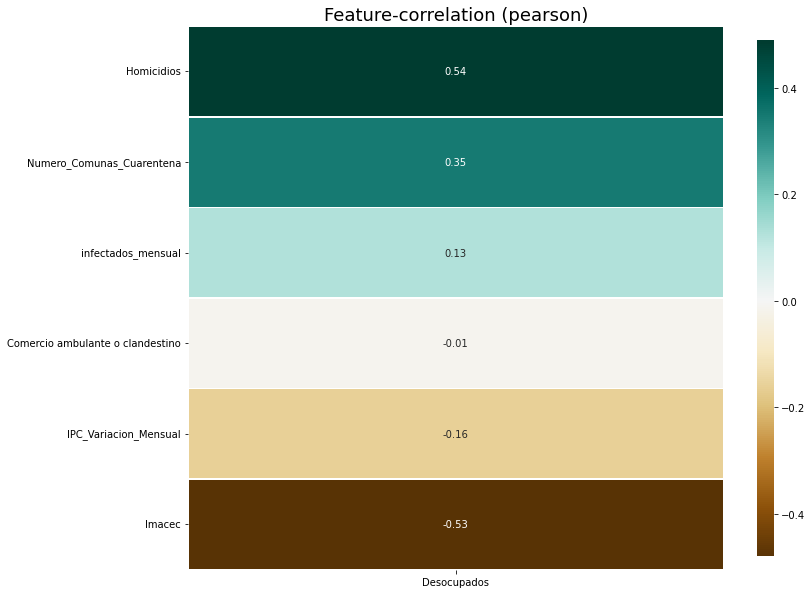

In [ ]:
klib.corr_plot(df, target='Desocupados')

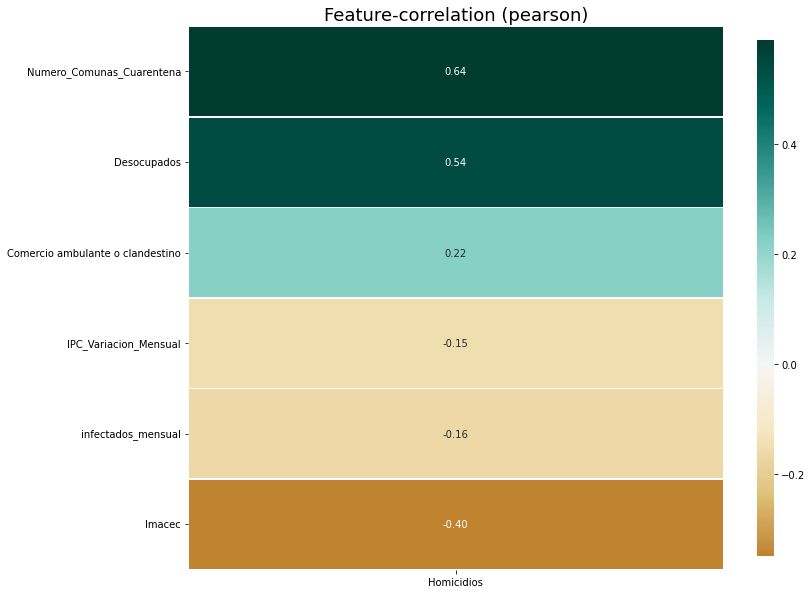

In [ ]:
klib.corr_plot(df, target='Homicidios')

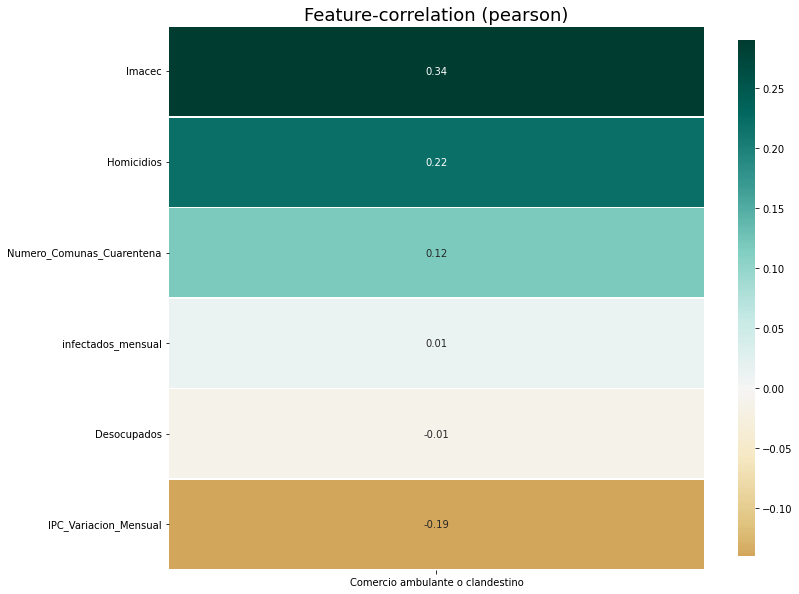

In [ ]:
klib.corr_plot(df, target='Comercio ambulante o clandestino')

# Exploracion Grafica

## Grafico de dispersion Numero de comunas en cuarentena-Homicidios

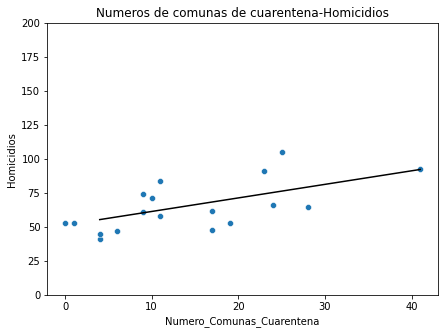

In [ ]:
plt.figure(figsize=(7,5))
plt.ylim(0, 200)
sns.scatterplot(x = "Numero_Comunas_Cuarentena", y= "Homicidios", data=df)
plt.title("Numeros de comunas de cuarentena-Homicidios")
plt.plot(X_test, y_predict_RL,color='k')




## Numeros de comunas de cuarentena-Desocupados

Text(0.5, 1.0, 'Numeros de comunas de cuarentena-Desocupados')

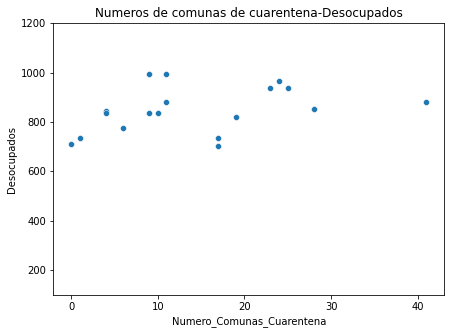

In [ ]:
plt.figure(figsize=(7,5))
plt.ylim(100, 1200)
sns.scatterplot(x = "Numero_Comunas_Cuarentena", y= "Desocupados", data=df)
plt.title("Numeros de comunas de cuarentena-Desocupados")



## Numeros de comunas de cuarentena-Imacec

Text(0.5, 1.0, 'Numeros de comunas de cuarentena-Imacec')

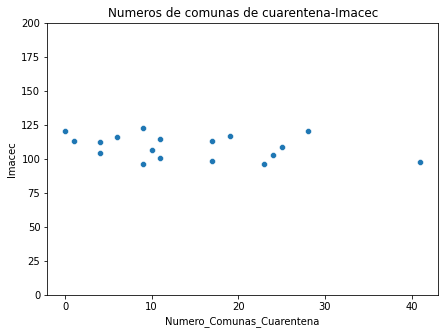

In [ ]:
plt.figure(figsize=(7,5))
plt.ylim(0, 200)
sns.scatterplot(x = "Numero_Comunas_Cuarentena", y= "Imacec", data=df)
plt.title("Numeros de comunas de cuarentena-Imacec")


# Entrenamiento y estandarizacion

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



X = df[["Numero_Comunas_Cuarentena","Desocupados","Imacec"]]
y = df["Homicidios"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)


scalerX = StandardScaler().fit(X_train)


X_train = scalerX.transform(X_train)

X_test = scalerX.transform(X_test)




# Regresion Lineal

In [ ]:
Modelo_Regresion = LinearRegression(n_jobs=1000)
Modelo_Regresion.fit(X_train,y_train)
Modelo_Regresion.score(X_test,y_test)


0.6591503243927943

In [ ]:
Modelo_Regresion.score(X_train,y_train)

0.4602791574722681

In [ ]:

y_predict_RL= Modelo_Regresion.predict(X_test)
R2 = r2_score(y_test,y_predict_RL)
print(R2)

0.48496519866660226


In [ ]:
from sklearn.linear_model import LinearRegression
parameters = {
              "fit_intercept": [True, False],
               
             }
grid = GridSearchCV(estimator=reg, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.6606678425716908

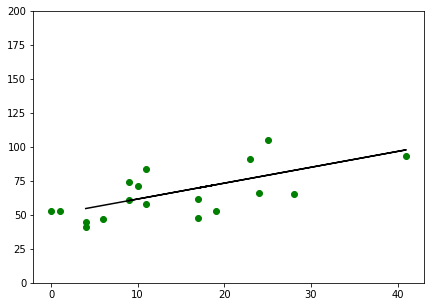

In [ ]:
plt.figure(figsize=(7,5))
plt.ylim(0, 200)
plt.scatter(X, y,color='g')
plt.plot(X_test, y_predict_RL,color='k')

plt.show()